Ejercicio: Suponga que le han pedido averiguar si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos:

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.", 
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]

In [8]:
bateos = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 
          5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 
          5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

In [9]:
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

In [42]:
datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs':
runs})
datos

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


Para esto obtenga lo siguiente:
1. Obtenga la distribución de los datos

In [13]:
datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


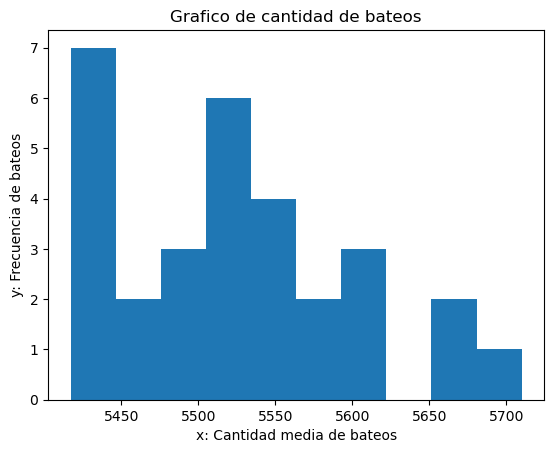

In [16]:
#Importar librerias
fig,ax = plt.subplots()
#cantidad media de habitaciones
x = datos["bateos"]
ax.hist(x, color = "tab:blue")
#Titulos
plt.title('Grafico de cantidad de bateos')
plt.xlabel('x: Cantidad media de bateos')
plt.ylabel('y: Frecuencia de bateos')
plt.show()

2. Separe sus datos de entrenamiento en 80/20.

In [18]:
msk = np.random.rand(len(datos)) < 0.8
train = datos[msk]
test = datos[~msk]

3. Ajuste un modelo de regresión lineal.

In [19]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import sklearn as skl
from sklearn import linear_model
# Modelo de entrenamiento
lm = linear_model.LinearRegression()

4. Escriba la recta de regresión que obtuvo con sus estimaciones respectivas.


In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['bateos']])
train_y = np.asanyarray(train[['runs']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ('\n')
print ('La recta es: y = x * ',regr.coef_ ,' + ',regr.intercept_)

Coefficients:  [[0.64702659]]
Intercept:  [-2875.62673477]


La recta es: y = x *  [[0.64702659]]  +  [-2875.62673477]


5. Obtenga la gráfica de los datos y su recta de regresión

Text(0.5, 1.0, 'Grafico de regresion')

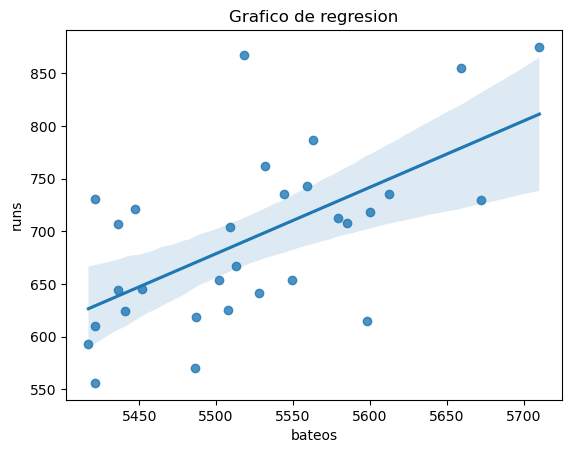

In [40]:
import seaborn as sns
%matplotlib inline
# A través del dibujo, puede hacer una observación intuitiva sobre la relación lineal de los datos
sns.regplot(x='bateos',y='runs',data=datos)
plt.title('Grafico de regresion')

6. Obtenga las métricas: MAE, MSE, RMSE.

In [37]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['bateos']])
test_y = np.asanyarray(test[['runs']])
test_y_ = regr.predict(test_x)
mse = np.mean((test_y_ - test_y) ** 2)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score (RMSE): %.2f" % np.sqrt(mse) )

Mean absolute error (MAE): 53.03
Residual sum of squares (MSE): 3064.09
R2-score (RMSE): 55.35


7. Concluya con los datos obtenidos y comente la problemática que le han
planteado al principio.

Se concluye que los batos son valores mucho mas grandes que los runs en proporcion, por equipos. Estos tienen una tendencia de aumento, sin embargo los valores se encuentran dispersos. Respecto al los errores de los datos contra el modelo de la recta de regresion, y los valores reales son altos. Por lo que la relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue, no esta relacionado fuertemente.